# EDA  (Exploratory Data Analysis.)

<strong>
Dataset used is: Titanic Dataset from Kaggle
<br>
The prediction will be of a classification- survival or deceased.
<br>
Variable Notes
<br>
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
 
<br>
Sibling = brother, sister, stepbrother, stepsister
    <br>
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
<br>
Parent = mother, father
<br>
Child = daughter, son, stepdaughter, stepson
<br>
Some children travelled only with a nanny, therefore parch=0 for them.
</strong>

# STEP1:-  Importing the Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step2: Loading the Dataset

In [2]:
df = pd.read_csv('titanic_train.csv')

# Step3: Observing the dataset with following steps.
1. dataset.shape
2. dataset.columns to understand columns definition
3. dataset.head() and tail()
4. dataset.info() or dataset.dtypes
5. dataset.describe(include='all')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 6 point summary is same as describe and this tells alot about the data.

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<strong>
Plotting a histogram for each column to check the understanding of data with describe
    </strong>

<strong>
Function for histogram
</strong>

In [8]:
def plot_hist(variable):
    plt.figure(figsize=((10,8)))
    plt.hist(df[variable],bins=50)
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.title("()distribution with HIST".format(variable))
    plt.show()

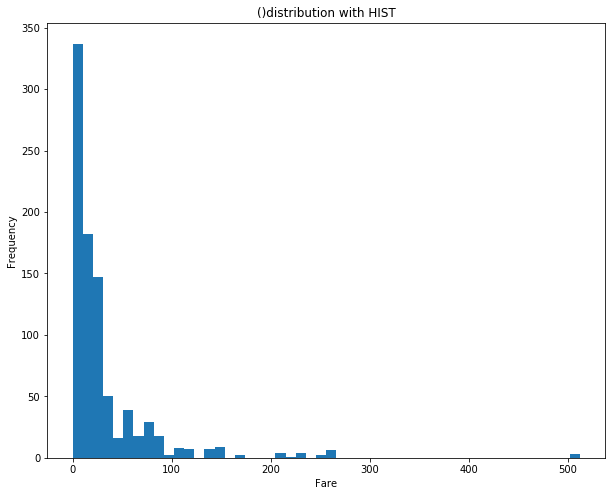

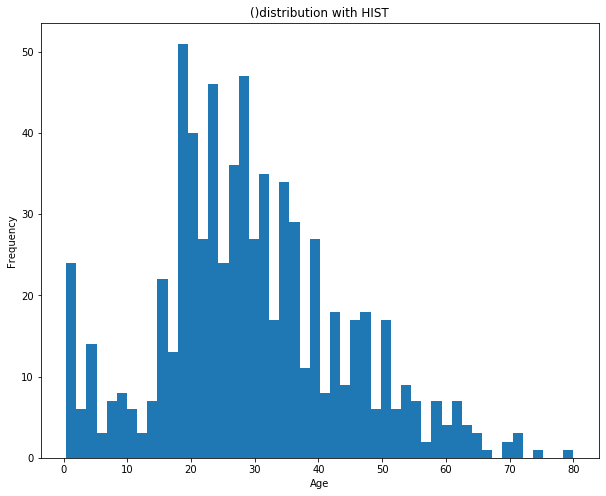

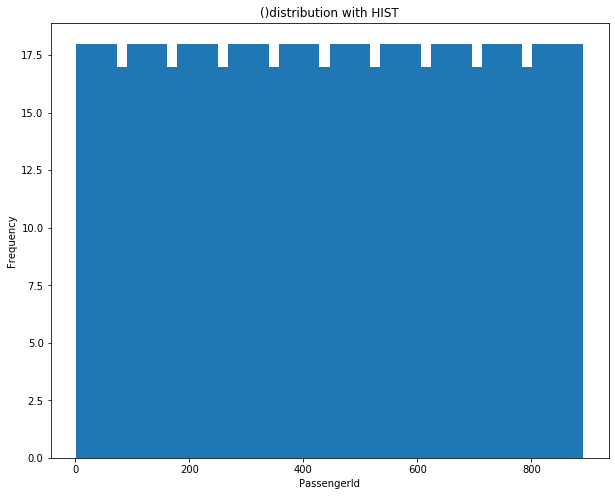

In [9]:
numericVar= ['Fare','Age','PassengerId']
for n in numericVar:
    plot_hist(n)

#### Understanding the Categorical Value in our data.

When a categorical value is present it looks on the following:
<br>
<strong>How distributed is the categorical variable(column)</strong>
the values should have decent representation in the data.
then it will be easier to model them.
<br>
 This can be resolved by applying a <strong>Variance Filter</strong>  High, Low.
 <br>
<strong> High Variance Filter:</strong> When a variable has high Variance. the data becomes useless. like example 99% being male and 1% being female.
<strong>Low Variance Filter:</strong> Similarly,if the variable has low Variance. the data again becomes useless. like example: 1% being female and 99% being male.

In [11]:
#category1=['Survived','Pclass','Sex','SibSp','Parch']
#for c in category1:
    bar_plot(c)

IndentationError: unexpected indent (<ipython-input-11-03b6c7fd921f>, line 3)

### Run duplicate check

In [12]:
duplicate= df[df.duplicated()]

In [13]:
duplicate.shape

(0, 12)

In [14]:
duplicate

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Use in-built function dataset.isnull()
*<strong>True--> Null value Present </strong>

*<strong>False--> Null Value is not there.</strong>

<strong>
    This is not useful and feasible for large datasets
    Instead use Visualization from the seaborn library
</strong>

In [ ]:
df.isnull()

## Visualization using Seaborn library.

### All Null values are shown in yellow color.

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<strong>
    Roughly 20% of the Age data is missing. The proportion of age missing is likely small enough for remarkable replacement with some form of imputations.
    
Now, Looking at the deck column it seems most of the data is missing, thus might be difficult to do something useful with a bsaic level.
Drop this column later or change it tpo categorical format like deck Known 1 or 0.        
</strong>

# Data Analysis/ Reading using Count plot

### Based on the survived column build a countplot.
<strong>
This will indicate the count of people survived or deceased.
</strong>

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

# To check the number of 'males' and 'females' survived

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df,palette='RdBu_r')

### Check with the help of Passenger Class the Survival Rate.

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

# Checking for the average AGE for the People on-board we can plot a normal distribution

In [ ]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=10)

# Do a count plot to check for the sibbling and spouse.

In [ ]:
sns.countplot(x='SibSp',data=df)

# Step 3: Data Cleaning

# 3 a) Handling the Missing Data.

<strong>
We want to handle the missing age data instead of just dropping the missing age row.  
One way to do this is by filling in the mean age of all the passengers.This can be done in a better way by checking the average age in passengerclass(pclass).    
</strong>
<br>
Using <strong>Central Tendency</strong> to fill up for the Missing value canlead to problem.
Example if we have 20% missing data and we try to fill in that data with mean/median(central tendency) then 20% of the data will now have the "same" value which might affect the dataset in overall and <strong> completly change the value for the Central tendency for the new dataset.</strong>
Thus the predictions can be in accurate.
So this should be avaoided or less frequently used.

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

### Impute average age values based on 'pclass' for age

In [ ]:
def impute_age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        if pclass== 1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return age
    

# Applying the above Function

In [ ]:
df['Age']= df[['Age','Pclass']].apply(impute_age,axis=1)

# Check if it is applied

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<strong>
Now we can see there is no null value in age column.
    
Now check for the deck column.
It can be seen that there are many Null values for that column.
This can be handled in 2 ways:-
    <br>
    *1. Drop the entire column due to the large number of Null values present.
    <br>
    *2. Apply feature Engineering.
</strong>

In [ ]:
df.columns

In [ ]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.columns

In [ ]:
df.head()

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Converting Categorical Features

<strong>
   Convert categorical features to dummy variable using pandas. 
    <br>
        1. Sex column
    <br>
    2. embark_town column
    </strong>

#### Working with embark column
embark has 3 types of data---> 1. S, 2.C, 3.Q

In [ ]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

In [ ]:
sex= pd.get_dummies(df['Sex'],drop_first=True)
embark_town=pd.get_dummies(df['Embarked'],drop_first=True)

# Dropping the Not requird Columns

In [ ]:
df.columns

In [ ]:
df.drop(['PassengerId', 'Name','Age', 'SibSp',
       'Parch' ],axis=1,inplace=True)

In [ ]:
df.head()

In [ ]:
df.drop(['Ticket','Fare'],axis=1,inplace=True)

In [ ]:
df.head()